# Morpological Operations

In [29]:
# Erosion

import cv2
import numpy as np
# kernel=np.ones((5,5),np.unit8)
kernel = np.ones((5,5),np.uint8)
img = cv2.imread("img4.jpg")
cv2.imshow("img",cv2.erode(img,kernel,iterations=1))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
# Dilation

cv2.imshow("img",cv2.dilate(img,kernel,iterations=0))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [35]:
# opening
cv2.imshow("img",cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel))
cv2.waitKey(0)
cv2.destroyAllWindows()

In [41]:
cv2.imshow("img",cv2.Canny(img,200,200))
cv2.waitKey(0)
cv2.destroyAllWindows()

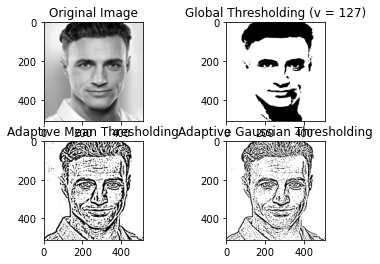

In [66]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
img = cv.imread('img4.jpg',0)
img = cv.medianBlur(img,5)
ret,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
th2 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_MEAN_C,\
            cv.THRESH_BINARY,11,2)
th3 = cv.adaptiveThreshold(img,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv.THRESH_BINARY,11,2)
titles = ['Original Image', 'Global Thresholding (v = 127)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]
for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow((images[i]),'gray')
    plt.title(titles[i])
#     plt.xticks([]),plt.yticks([])
plt.show()

In [3]:
import cv2
import numpy as np
img = cv2.imread("img4.jpg")
kernelx = np.array([[1,1,1],
                    [0,0,0],
                    [-1,-1,-1]])
cv2.imshow("img",cv2.filter2D(img,-1,kernelx))
cv2.imshow("img",cv2.Sobel(img,cv2.CV_8F,1,0))
cv2.waitKey(0)
cv2.destroyAllWindows()

AttributeError: module 'cv2' has no attribute 'CV_8F'

In [72]:
import cv2
import numpy as np

img = cv2.resize(cv2.imread("img3.jpg"),(0,0),fx=0.1,fy=0.1)

def showImage(img,name="image"):
    cv2.imshow(name,img)
    cv2.waitKey(0)

img2 = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

filter = cv2.GaussianBlur(img2,(3,3),0)

sobelx = cv2.Sobel(filter,cv2.CV_64F,1,0,ksize=5,)
sobely = cv2.Sobel(filter,cv2.CV_64F,0,1,ksize=5)
sobel = sobelx + sobely

kernelx = np.array([[1,1,1],
                    [0,0,0],
                    [-1,-1,-1]])
kernely = np.array([[-1,0,1],
                    [-1,0,1],
                    [-1,0,1]])
prewittx = cv2.filter2D(filter, -1, kernelx)
prewitty = cv2.filter2D(filter, -1, kernely)

canny = cv2.Canny(img2,150,255,)

showImage(img,"Main Image")
showImage(filter,"Filter")
# showImage(sobelx,'SobelX')
# showImage(sobely,'SobelY')
showImage(sobel,'Sobel')
showImage(prewittx,'Prewittx')
showImage(prewitty,'Prewitty')
showImage(canny,'Canny')

cv2.destroyAllWindows()

In [1]:
import numpy as np 
import cv2 as cv

img = cv.imread('bin.png')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

ret, thresh = cv. threshold(gray, 0, 255, cv. THRESH_BINARY_INV+cv.THRESH_OTSU)

kernel = np.ones((3,3), np. uint8)

opening = cv.morphologyEx(thresh, cv.MORPH_OPEN, kernel, iterations = 2)

sure_bg= cv.dilate(opening, kernel, iterations=3)

dist_transform = cv.distanceTransform(opening, cv.DIST_L2,5) 
ret, sure_fg = cv.threshold(dist_transform, 0.7*dist_transform.max(),255,0)

sure_fg = np.uint8(sure_fg)

unknown=cv.subtract(sure_bg, sure_fg)

ret, markers = cv.connectedComponents (sure_fg)
markers = markers+1
markers[unknown==255] = 0

markers = cv.watershed (img, markers) 
img[markers == -1] = [255,0,0]

cv.imshow("water", unknown)

cv.imshow('markker', img)
cv.waitKey(0)
cv.destroyAllWindows()

In [15]:
import cv2
import numpy as np

img = cv2.imread("img4.jpg")

def showImage(img,name="Image"):
    cv2.imshow(name,img)
    cv2.waitKey(0)

gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

showImage(img,"Main Image")

ret, thresh = cv2.threshold(gray, 127, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[4]
for cnt in contours:
    cv2.drawContours(img, [cnt], 0, (0,255,0), 1)

showImage(img,"Contours Image")
cv2.destroyAllWindows()

In [19]:
import cv2
import numpy as np

img = cv2.resize(cv2.imread("img3.jpg"),(0,0),fx=0.1,fy=0.1)

def showImage(img,name="image"):
    cv2.imshow(name,img)
    cv2.waitKey(0)

showImage(img,"Image")

img2 = np.copy(img[275:350,350:550])
img[275:350,350:550]=0
showImage(img,"Image")
showImage(img2,"ROI")

cv2.destroyAllWindows()

In [20]:
import cv2
import numpy as np

img = cv2.resize(cv2.imread("img3.jpg"),(0,0),fx=0.1,fy=0.1)

def showImage(img,name="image"):
    cv2.imshow(name,img)
    cv2.waitKey(0)

showImage(img,"Image")

def smoothImage(img,n):
    R = np.ones((n,n),np.float32)/(n*n)
    return cv2.filter2D(img,-1,R)

    cv2.fil

showImage(smoothImage(img,1),"Smooth Image1")
showImage(smoothImage(img,2),"Smooth Image2")
showImage(smoothImage(img,3),"Smooth Image3")
showImage(smoothImage(img,4),"Smooth Image4")
showImage(smoothImage(img,5),"Smooth Image5")

cv2.destroyAllWindows()

In [39]:
import cv2
sharpen_kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]])
sharpen_img = cv2.filter2D(img,-1,sharpen_kernel)
# cv2.imshow("sharpen",sharpen_img)
cv2.imshow("img",cv2.blur(img,(10,10)))
cv2.waitKey(0)
cv2.destroyAllWindows()